In [1]:
%matplotlib inline
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tqdm

### Define function to be optimized

In [3]:
f = lambda x: x**2
f_prime = lambda x: 2*x

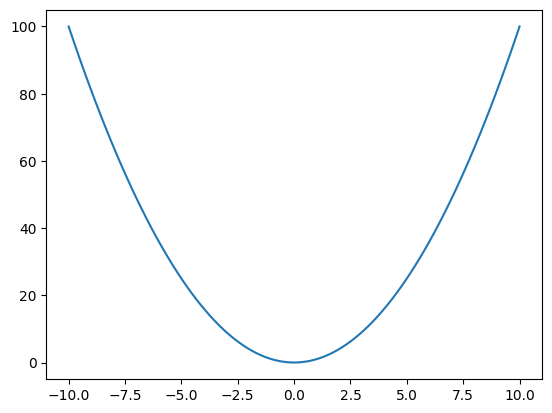

In [4]:
xs = np.linspace(-10, 10, 100)
ys = f(xs)
ys_prime = f_prime(xs)
plt.plot(xs, ys)

### Compute example gradient and compare to true gradient

In [5]:
x0 = torch.tensor(-10.0, requires_grad=True)
y = f(x0)
y.backward()
print(x0.grad)
print(f_prime(x0))

tensor(-20.)
tensor(-20., grad_fn=<MulBackward0>)


### Do vanilla gradient descent and plot result

In [6]:
x_learned = [x0.item()]
lr = 0.01
for i in range(100):
    # Zero the gradient for the next iteration
    x0.grad.zero_() 
    # Calculate the forward pass
    y = f(x0)
    # Calculate the gradient of the forward pass
    y.backward()
    
    #with torch.no_grad():
    x0.data = x0.data - lr * x0.grad
    
    x_learned.append(x0.item())


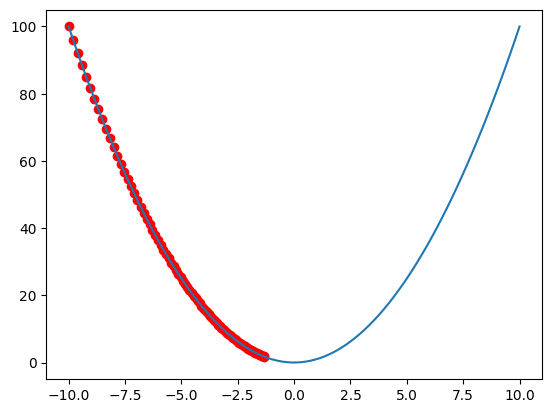

In [7]:
plt.plot(x_learned, [f(x) for x in x_learned], 'ro')
plt. plot(xs, ys)